importing Jupyter notebook from visualization.ipynb
Percentage of NaN values in the dataset -> 7.37%
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    30162 non-null  int64 
 1   workclass              30162 non-null  object
 2   fnlwgt                 30162 non-null  int64 
 3   education              30162 non-null  object
 4   education-num          30162 non-null  int64 
 5   marital-status         30162 non-null  object
 6   occupation             30162 non-null  object
 7   relationship           30162 non-null  object
 8   race                   30162 non-null  object
 9   sex                    30162 non-null  object
 10  capital-gain           30162 non-null  int64 
 11  capital-loss           30162 non-null  int64 
 12  hours-per-week         30162 non-null  int64 
 13  native-country      

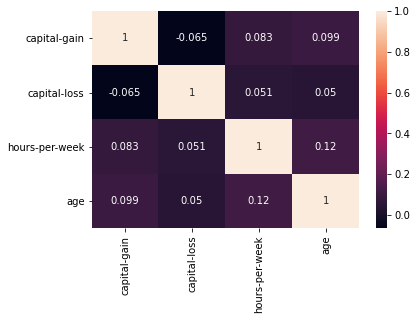

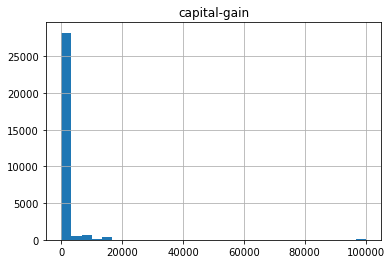

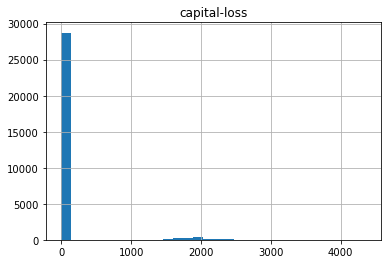

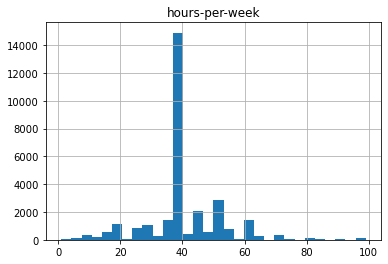

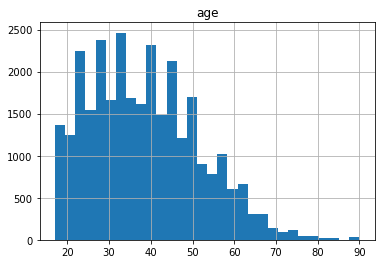

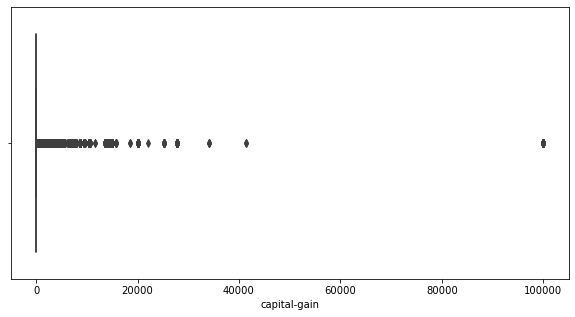

<Figure size 432x288 with 0 Axes>

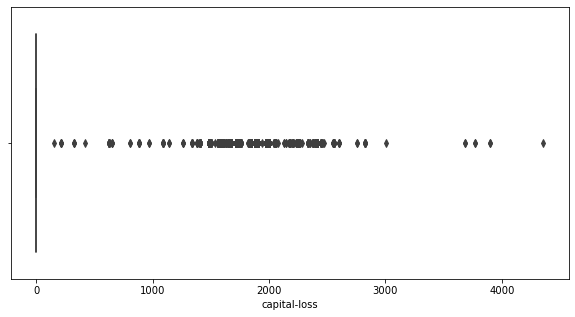

<Figure size 432x288 with 0 Axes>

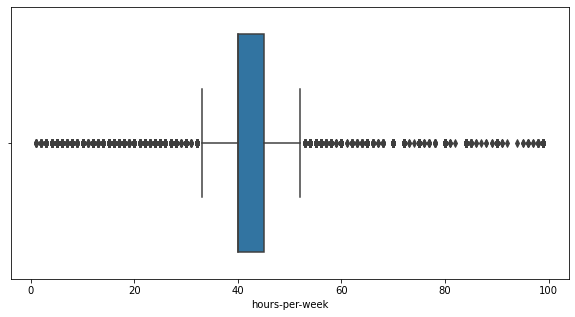

<Figure size 432x288 with 0 Axes>

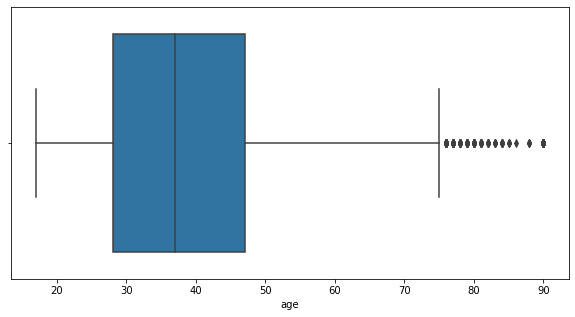

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 El-Salvador                     100
 India                           100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 Italy                            68
 China                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Haiti                            42
 Ir

<Figure size 432x288 with 0 Axes>

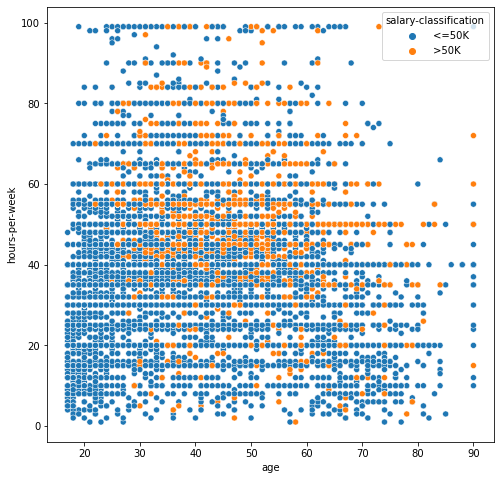

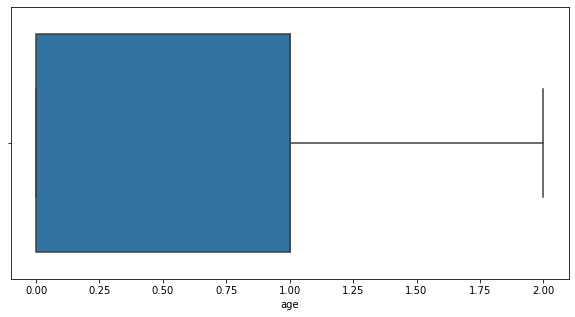

<Figure size 432x288 with 0 Axes>

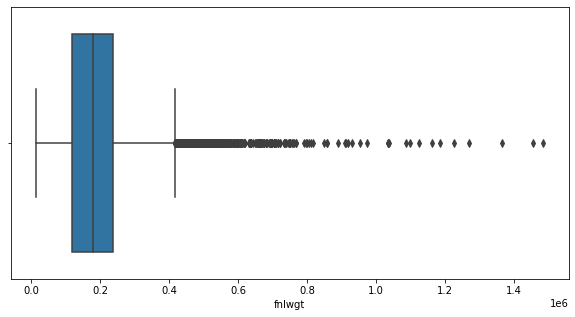

<Figure size 432x288 with 0 Axes>

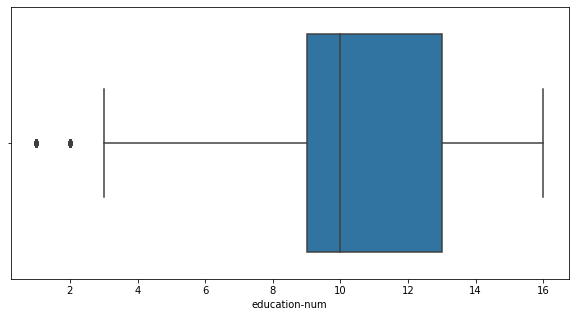

<Figure size 432x288 with 0 Axes>

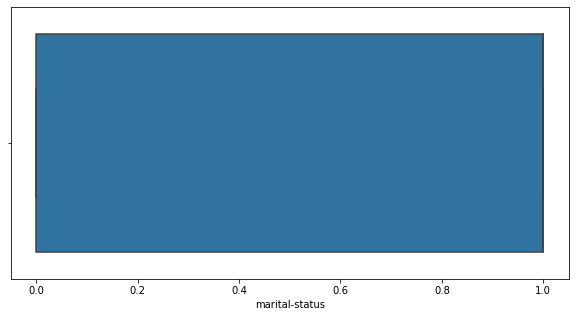

<Figure size 432x288 with 0 Axes>

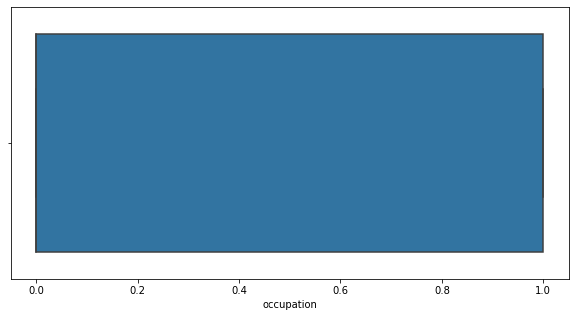

<Figure size 432x288 with 0 Axes>

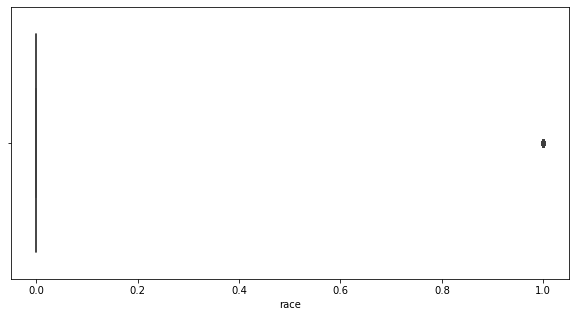

<Figure size 432x288 with 0 Axes>

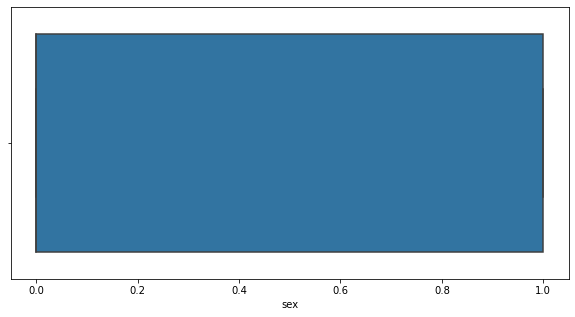

<Figure size 432x288 with 0 Axes>

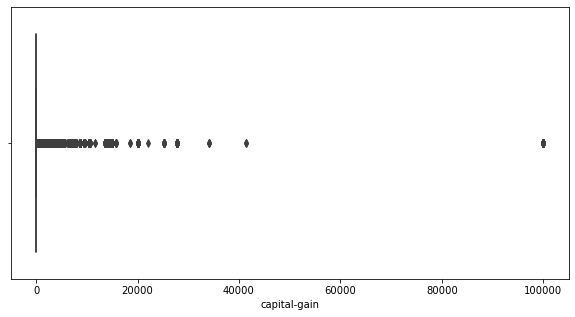

<Figure size 432x288 with 0 Axes>

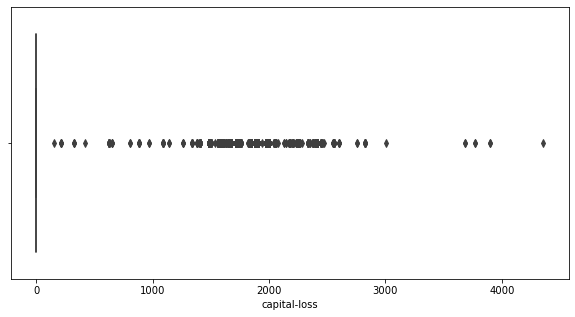

<Figure size 432x288 with 0 Axes>

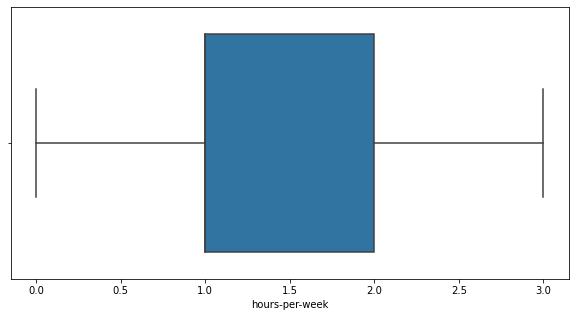

<Figure size 432x288 with 0 Axes>

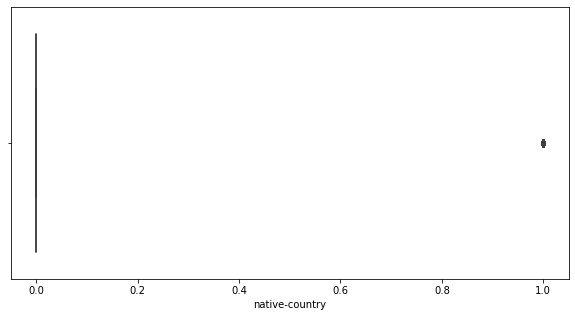

<Figure size 432x288 with 0 Axes>

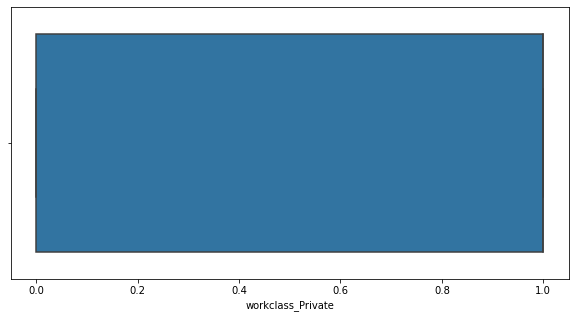

<Figure size 432x288 with 0 Axes>

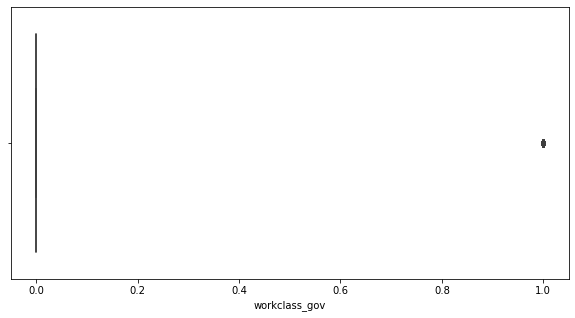

<Figure size 432x288 with 0 Axes>

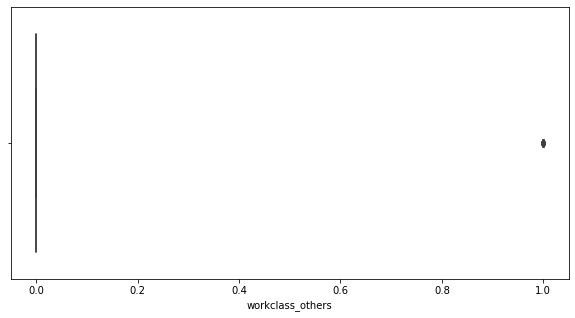

<Figure size 432x288 with 0 Axes>

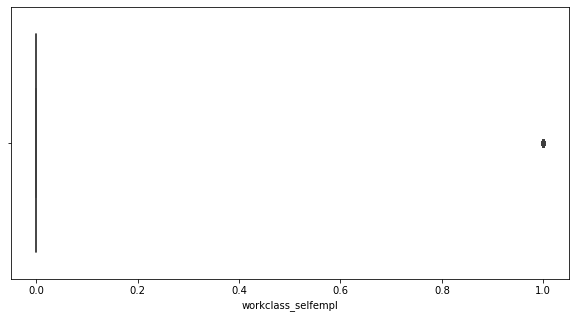

<Figure size 432x288 with 0 Axes>

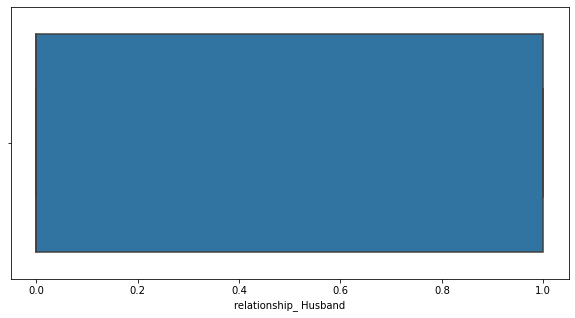

<Figure size 432x288 with 0 Axes>

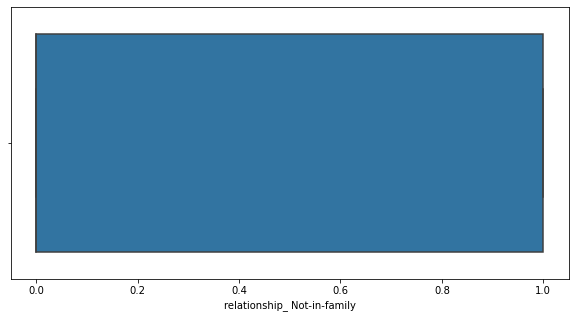

<Figure size 432x288 with 0 Axes>

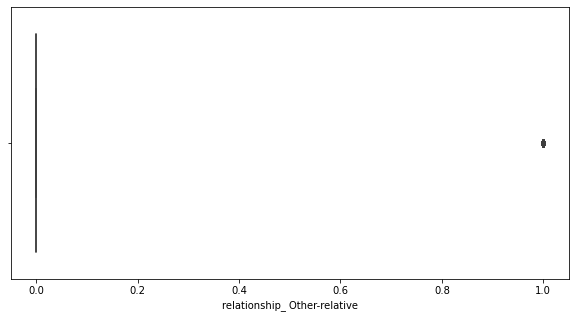

<Figure size 432x288 with 0 Axes>

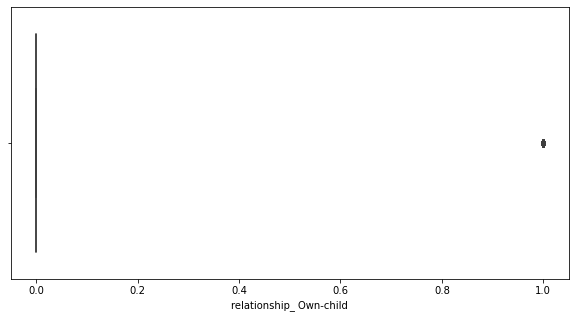

<Figure size 432x288 with 0 Axes>

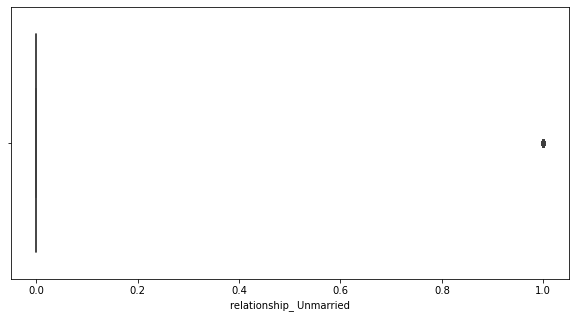

<Figure size 432x288 with 0 Axes>

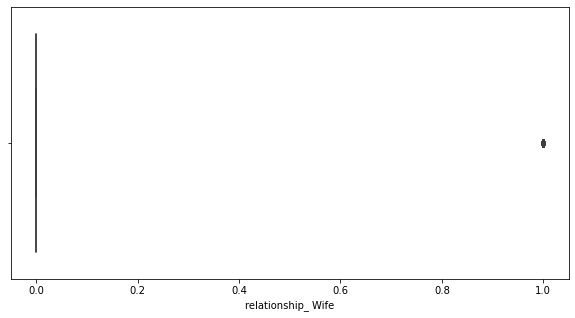

ValueError: Could not interpret input 'workclass'

<Figure size 432x288 with 0 Axes>

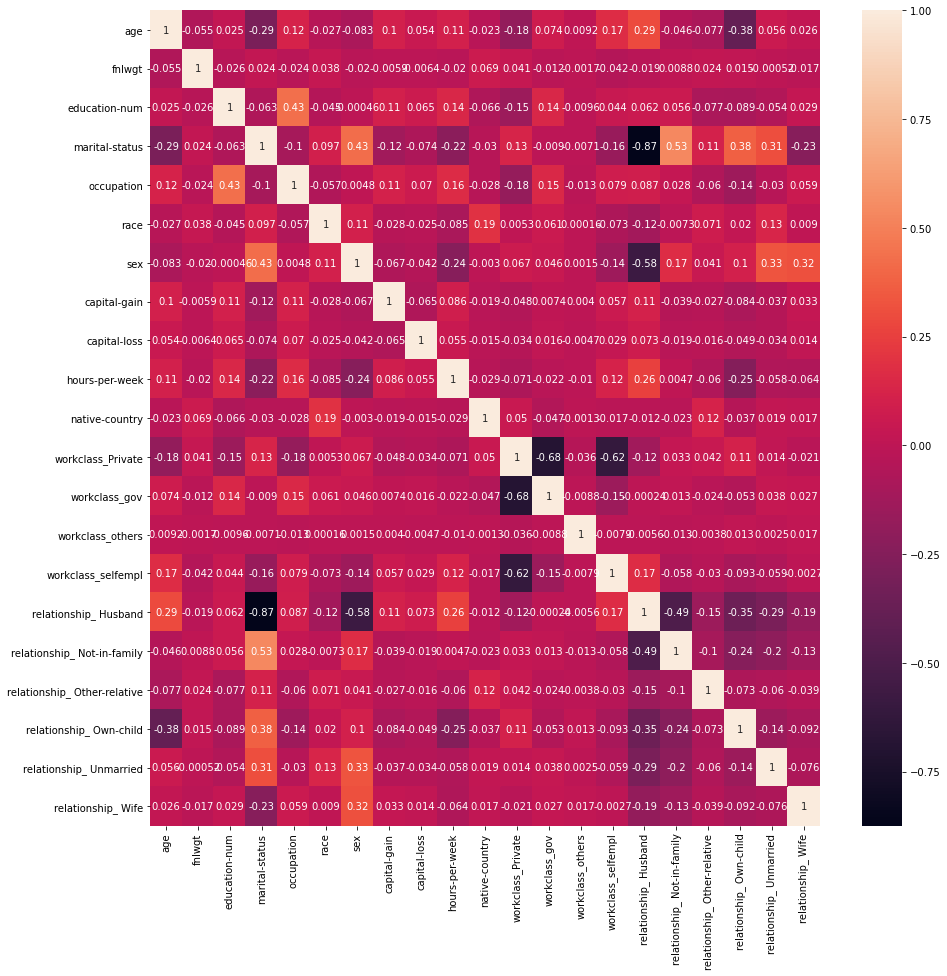

In [1]:
# Note the python import here
import reuse, sys

# This is the Ipython hook
sys.meta_path.append(reuse.NotebookFinder())
import visualization;

In [ ]:
pd.crosstab(training['occupation'], training['salary-classification'])

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# Load train and test dataset

In [ ]:
training = pd.read_csv("training.csv")
test = pd.read_csv("test.csv")

# Remove unnecessary columns

In [ ]:
training = training.drop("education", 1)
test = test.drop("education", 1)

# Replace all '?' by NaN and drop rows containing the latter

In [ ]:
for data in training:
    training[data].replace(' ?', np.nan, inplace=True)
    
for data in test:
    test[data].replace(' ?', np.nan, inplace=True)

training.dropna(inplace=True)
test.dropna(inplace=True)

# Turning non-numerical values into numerical

In [ ]:
ord_enc = OrdinalEncoder()
for i in ['workclass','marital-status','occupation','relationship','race','sex','native-country','salary-classification']:
    training[i] = ord_enc.fit_transform(training[[i]]).astype(int)
    test[i] = ord_enc.fit_transform(test[[i]]).astype(int)

In [ ]:
X_train = training.drop('salary-classification',1)
y_train = training['salary-classification']
X_test = test.drop('salary-classification',1) 
y_test = test['salary-classification']

# Filter Methods

## Variance Threshold

In [ ]:
selector = VarianceThreshold()
selector.fit_transform(X_train)
selector.variances_

## SelectKBest

In [ ]:
selector = SelectKBest(f_classif, k=13)
selector.fit(X_train, y_train)
cols = selector.get_support(indices=True)
cols_names = list(X_train.columns[cols])

for idx, (ci, cn) in enumerate(zip(cols, cols_names)):
    print("*" * (len(cols) - idx) + " " * idx, ci, cn)

X_train = X_train[cols_names]
X_test = X_test[cols_names]

scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
values_standardized_train = scaler.fit_transform(X_train.values)
values_standardized_test = scaler.fit_transform(X_test.values)
X_train = pd.DataFrame(values_standardized_train, columns = X_train.columns)
X_test = pd.DataFrame(values_standardized_test, columns = X_test.columns)

clf_model = SVC()

clf_model.fit(X_train,y_train)
score = clf_model.score(X_test,y_test)
print(score)

# Wrapper Methods

## Recursive Feature Elimination

In [ ]:
model = LogisticRegression(solver='lbfgs',max_iter=5000)
rfe = RFE(model,step=1)
fit = rfe.fit(X_train,y_train)
print('Optimal number of features: {}'.format(rfe.n_features_))
print(fit.support_)
print(fit.ranking_)
cols = rfe.get_support(indices=True)
cols_names = list(X_train.columns[cols])
cols
selected_features = pd.DataFrame({'Feature':list(X_train.columns),'Ranking':rfe.ranking_})
tabela = selected_features.sort_values(by='Ranking')
tabela.to_latex()
tabela

# Embedded methods

## Principal Component Analysis

In [ ]:
pca=PCA()
fit=pca.fit(X_train)
print(fit.explained_variance_ratio_)

## Feature Importance

In [ ]:
model = ExtraTreesClassifier(n_estimators=13)
model.fit(X_train, y_train)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d - %s (%f)" % (f+1, indices[f], X_train.columns[indices[f]], importances[indices[f]]))